In [1]:
import numpy as np
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

classifiers = [LogisticRegression(),
               GradientBoostingClassifier(), 
               RandomForestClassifier(), 
               SVC()]
classifiers_name = ["LogisticRegression",
               "GradientBoostingClassifier", 
               "RandomForestClassifier", 
               "SVC"]

In [37]:
xls_file = pd.ExcelFile('retail_vol_ccy_w_rt.xlsx')
df = xls_file.parse('Total')
df.head()

,Date,vol_tot,vol_rub,vol_ccy,expo_tot,portf_gr,expo_rub,expo_ccy,npl_tot,npl_rub,npl_ccy,rubusd,wage,wage_gr,rt3m,dGPD,f_dec,unp
0,2009-04-01,456779.2,424697.2,32082.0,3848399.0,0.000000,3341053.6,507345.4,180597.6,155980.0,24617.6,33.9032,18009,0.000000,16.53,-0.035002,0,8.3
1,2009-05-01,228701.0,216410.3,12290.7,3791289.5,-0.014840,3300033.5,491256.0,193421.9,166553.5,26868.4,32.9740,18007,-0.000111,16.04,-0.035002,0,8.3
2,2009-06-01,221268.3,212818.6,8449.7,3722873.1,-0.018046,3266609.3,456263.8,202671.2,176069.2,26602.0,30.9843,19247,0.068862,12.49,-0.035002,0,8.3
3,2009-07-01,266435.9,256395.6,10040.3,3683033.9,-0.010701,3232124.6,450909.3,209446.2,182799.5,26646.7,31.0385,18872,-0.019484,11.81,-0.065562,0,8.3
4,2009-08-01,232492.2,221958.4,10533.8,3667260.9,-0.004283,3218173.3,449087.6,217713.4,190062.3,27651.1,31.1533,18335,-0.028455,11.89,-0.065562,0,8.3


In [15]:
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [71]:
df.sort?

In [ ]:
plt.plot(df['vol_tot'])
plt.plot(df['expo_tot'])
plt.plot(df['npl_tot'])
plt.show()

In [ ]:
plt.plot(df['rubusd'])
plt.plot(df['rt3m'])
plt.plot(df['wage']/300)
plt.show()

In [39]:
predictors = list(set(['rubusd','wage','wage_gr','rt3m','dGPD','f_dec', 'unp']))

Пока берем в качестве обучающей выборки всю выборку

In [44]:
X_train = df[predictors]
y_train = df['portf_gr']

X_test = df[predictors]
y_test = df['portf_gr']

In [40]:
corr = df[predictors].corr()
corr

,f_dec,dGPD,unp,rt3m,wage,rubusd,wage_gr
f_dec,1.000000,-0.005812,0.038185,-0.027643,0.313199,0.003313,0.734719
dGPD,-0.005812,1.000000,-0.455573,-0.487584,0.021840,-0.353770,0.000807
unp,0.038185,-0.455573,1.000000,-0.178049,-0.745692,-0.428949,0.064783
rt3m,-0.027643,-0.487584,-0.178049,1.000000,0.407999,0.641749,-0.083105
wage,0.313199,0.021840,-0.745692,0.407999,1.000000,0.743579,0.269423
rubusd,0.003313,-0.353770,-0.428949,0.641749,0.743579,1.000000,-0.022971
wage_gr,0.734719,0.000807,0.064783,-0.083105,0.269423,-0.022971,1.000000


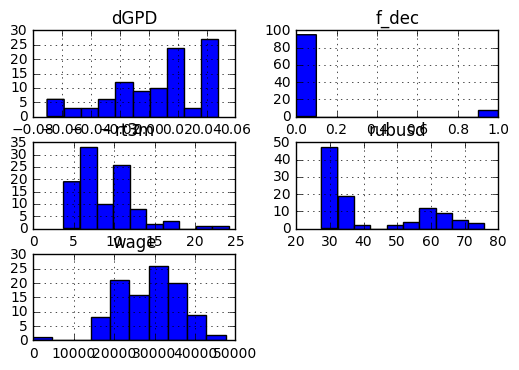

In [33]:
plots = df[predictors].hist()

In [42]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
forest = RandomFores(n_estimators=500)
forest.fit(X_train, y_train)
test_pred = forest.predict(X_test)

ValueError: Unknown label type: array([[  0.00000000e+00],
       [ -1.48398074e-02],
       [ -1.80456808e-02],
       [ -1.07011974e-02],
       [ -4.28261059e-03],
       [ -5.85903228e-03],
       [ -1.13059385e-02],
       [ -6.80572145e-03],
       [ -2.29624172e-03],
       [ -2.64211085e-03],
       [ -8.56399908e-03],
       [ -5.69020612e-03],
       [  9.45394632e-05],
       [  9.91032982e-03],
       [  1.41131732e-02],
       [  1.68845499e-02],
       [  1.58898102e-02],
       [  1.90537191e-02],
       [  1.73379355e-02],
       [  1.70206492e-02],
       [  1.59001284e-02],
       [  2.10850215e-02],
       [ -1.34078240e-03],
       [  6.73631965e-03],
       [  2.13106617e-02],
       [  2.79826792e-02],
       [  3.06136769e-02],
       [  3.23771778e-02],
       [  2.88781226e-02],
       [  3.65048728e-02],
       [  3.61075438e-02],
       [  2.36225125e-02],
       [  3.06196335e-02],
       [  4.02723908e-02],
       [  5.67744188e-03],
       [  2.07887557e-02],
       [  3.46290564e-02],
       [  3.74566819e-02],
       [  4.03577952e-02],
       [  3.25838059e-02],
       [  2.82135571e-02],
       [  3.58806974e-02],
       [  2.53581496e-02],
       [  2.92225847e-02],
       [  2.40903453e-02],
       [  2.25340859e-02],
       [  8.14613666e-03],
       [  1.64594259e-02],
       [  2.19273503e-02],
       [  3.17443964e-02],
       [  2.68268881e-02],
       [  2.53006987e-02],
       [  2.77528501e-02],
       [  2.51602659e-02],
       [  1.41379050e-02],
       [  2.26216112e-02],
       [  1.51672152e-02],
       [  2.00945614e-02],
       [  2.35081436e-03],
       [  1.14634702e-02],
       [  1.32489224e-02],
       [  1.78400977e-02],
       [  1.03210989e-02],
       [  1.14714719e-02],
       [  1.70570293e-02],
       [  1.27876000e-02],
       [  1.21434784e-02],
       [  1.03400790e-02],
       [  1.02401638e-02],
       [  7.59423349e-04],
       [ -6.91541551e-03],
       [ -1.47179311e-02],
       [ -1.32954841e-02],
       [ -1.04534438e-02],
       [ -4.72640885e-03],
       [ -4.61663348e-03],
       [  5.89332355e-05],
       [  3.98963846e-03],
       [ -9.74533102e-04],
       [ -4.53525334e-03],
       [ -3.45260662e-03],
       [ -3.16336699e-04],
       [ -5.18815294e-03],
       [ -8.91021947e-04],
       [ -4.41887260e-03],
       [ -3.57036523e-04],
       [  2.04763277e-03],
       [  3.14595634e-04],
       [  5.32349200e-03],
       [  5.78171939e-03],
       [  2.98135856e-03],
       [  2.30598767e-03],
       [  3.85390882e-03],
       [  1.36983055e-03],
       [ -3.64441926e-03],
       [  5.17957619e-04],
       [  9.07707046e-03],
       [  1.02484730e-02],
       [  7.24933861e-03],
       [  1.11642639e-02],
       [  1.29219840e-02],
       [  1.61471702e-02],
       [  1.32103942e-02]])

In [ ]:
accuracy_score(y_test, test_pred)

In [ ]:
####пример модели
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation


def preProcess():
    df= pd.read_csv('C:/Users/X/Desktop/Managerial_and_Decision_Economics_2013_Video_Games_Dataset.csv',encoding ='ISO-8859-1')
    #drop non EA
    df = df[df['EA'] ==1]
    #change categorical variables
    le = LabelEncoder()
    nonnumeric_columns=['Console','Title','Publisher','Genre']
    for feature in nonnumeric_columns:
        df[feature] = le.fit_transform(df[feature])
    #set dataset and target variables
    dataset =df.ix[:, df.columns != 'US Sales (millions)']
    target = df['US Sales (millions)']

    trainx, testx, trainy, testy = cross_validation.train_test_split(
        dataset, target, test_size=0.3, random_state=0)
    #attempt to fix error?
    trainx=np.array(trainx)
    trainy = np.asarray(trainy, dtype="float")
    return trainx,testx,trainy,testy

def classifier():
    model =  ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    model.fit(trainx,trainy)
    return model.score(testx,testy)


trainx,testx,trainy,testy=preProcess()